<a href="https://colab.research.google.com/github/Usama3059/heart_disease/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

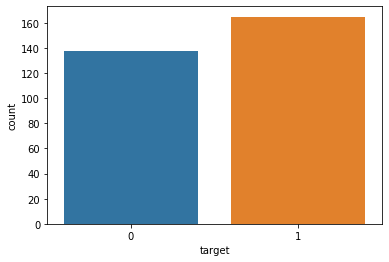

In [5]:
sns.countplot(x=data.target,data=data) 

In [6]:
No_disease=len(data[data.target==0])
have_disease=len(data[data.target==1])
print('patients have disease ' ,(have_disease/len(data.target))*100  )
print('patients  did not have disease ' ,(No_disease/len(data.target))*100  )

patients have disease  54.45544554455446
patients  did not have disease  45.54455445544555


In [7]:
(data.groupby('target')).mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


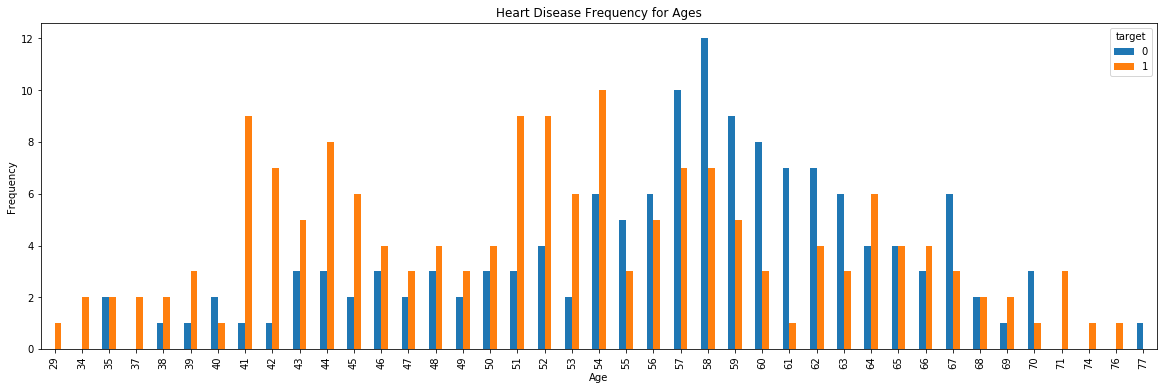

In [8]:
pd.crosstab(data.age,data.target).plot(kind='bar',figsize=(20,6))

plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

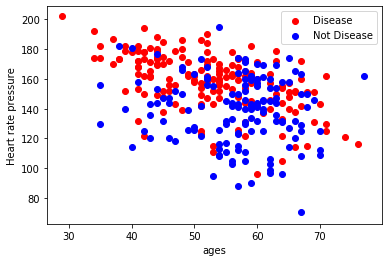

In [9]:
plt.scatter(x=data.age[data.target==1], y =data.thalach[data.target==1], c = 'red')
plt.scatter(x=data.age[data.target==0], y =data.thalach[data.target==0], c = 'blue')
plt.legend(['Disease','Not Disease'])
plt.xlabel('ages')
plt.ylabel('Heart rate pressure')
plt.show()

**DATA PREPROCESSING**

In [0]:
#NORMALIZE THE DATA

y=data.target.values
X_data =data.drop(['target'] , axis =1)
X_data.head()

x = X_data-np.min(X_data)/np.max(X_data)-np.min(X_data)


In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=0 )

In [12]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(242, 13)
(242,)
(61, 13)
(61,)


**LOGISTIC REGRESSION**

In [13]:
accuracies = {}

lr = LogisticRegression()
lr.fit(X_train,Y_train)
acc = lr.score(X_test,Y_test)*100

accuracies['Logistic Regression'] = acc
print("Test Accuracy  " ,acc)

Test Accuracy   85.24590163934425


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**RANDOMFOREST**

In [24]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_estimators = 1000 )
rf.fit(X_train,Y_train)
acc= rf.score(X_test,Y_test)*100
accuracies['RandomForest']=acc
print("Accuracy from Randomforest ",acc)

Accuracy from Randomforest  85.24590163934425


**DECISION TREE**

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

acc = dtc.score(X_test, Y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy " ,acc)

Decision Tree Test Accuracy  78.68852459016394


**NAIVE BAYES**

In [29]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

acc = nb.score(X_test,Y_test)*100
accuracies['Naive Bayes'] = acc
print("Accuracy of Naive Bayes:  ",acc) 

Accuracy of Naive Bayes:   85.24590163934425


**SUPPORT VECTOR**

In [31]:
from sklearn.svm import SVC
svm=SVC(random_state =1)
svm.fit(X_train,Y_train)
acc = svm.score(X_test,Y_test)*100
accuracies["Support Vector"]=acc
print("Support vector  ",acc)

Support vector   59.01639344262295


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
